In [3]:
from pyiron_base import Project
import fenics as FEN
import FEN_Poisson as FEP

In [4]:
pr = Project('test')

In [5]:
pr.remove_jobs_silently(recursive=True)
job = pr.create_job(job_type=FEP.FEN_Poisson, job_name="fen")

In [6]:
job.input

,Parameter,Value,Comment
0,a,,
1,L,,
2,vtk_filename,/output.pvd,
3,mesh,None,
4,BC,None,
5,V,None,


Calling FFC just-in-time (JIT) compiler, this may take some time.


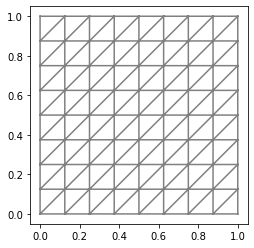

In [7]:
job.mesh_gen_default(8)
job.plot_mesh()

In [8]:
u_D = FEN.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

In [9]:
def boundary(x,on_boundary):
    return on_boundary

job.BC = job.DirichletBC(u_D, boundary)

In [10]:
job.f = job.Constant(-6.0)
job.a = job.dxProd(job.dot(FEN.grad(job._u), FEN.grad(job._v)))
job.L = job.dxProd(job.f*job._v)

In [11]:
job.run()

The job fen was saved and received the ID: 1
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


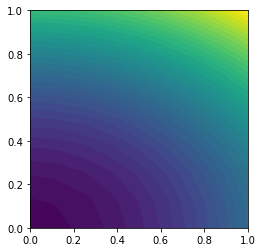

In [12]:
job.plot_u()

In [13]:
type(job.u)

dolfin.function.function.Function

In [14]:
job['output/generic/u']

array([1.      , 1.015625, 1.0625  , 1.140625, 1.25    , 1.390625,
       1.5625  , 1.765625, 2.      , 1.03125 , 1.046875, 1.09375 ,
       1.171875, 1.28125 , 1.421875, 1.59375 , 1.796875, 2.03125 ,
       1.125   , 1.140625, 1.1875  , 1.265625, 1.375   , 1.515625,
       1.6875  , 1.890625, 2.125   , 1.28125 , 1.296875, 1.34375 ,
       1.421875, 1.53125 , 1.671875, 1.84375 , 2.046875, 2.28125 ,
       1.5     , 1.515625, 1.5625  , 1.640625, 1.75    , 1.890625,
       2.0625  , 2.265625, 2.5     , 1.78125 , 1.796875, 1.84375 ,
       1.921875, 2.03125 , 2.171875, 2.34375 , 2.546875, 2.78125 ,
       2.125   , 2.140625, 2.1875  , 2.265625, 2.375   , 2.515625,
       2.6875  , 2.890625, 3.125   , 2.53125 , 2.546875, 2.59375 ,
       2.671875, 2.78125 , 2.921875, 3.09375 , 3.296875, 3.53125 ,
       3.      , 3.015625, 3.0625  , 3.140625, 3.25    , 3.390625,
       3.5625  , 3.765625, 4.      ])